# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Tue Apr 26 11:02:55 2022


In [5]:
#import os
import re
import glob

from collections import namedtuple

## Code

In [6]:
def generate_kr_toy(size = 100000, length = 100., e0 = 41.5, tau = 0.1, beta = 0.2, sigma = 0.05):
    """
    Generate Kr data: x, y, z, enegy
    """
    
    ts = stats.uniform.rvs(0, length, size = size)
    xs = stats.uniform.rvs(0, length, size = size) - 0.5 * length
    ys = stats.uniform.rvs(0, length, size = size) - 0.5 * length
    es = (1. - tau * ts/length) * stats.norm.rvs(loc = e0, scale = e0 * sigma, size = size)
    rs = np.sqrt(xs ** 2 + ys ** 2)
    er = es * (1 - beta * (2 * rs / length) ** 2)
    
    sel = rs < length/2
    df = {'dtime' : ts[sel], 'x': xs[sel], 'y': ys[sel], 'energy': er[sel]}
    return pd.DataFrame(df)
                                               

In [10]:
def plot_data(df):
    """
    Plot Kr Data
    """
    canvas = pltext.canvas(6, 2)
    canvas(1)
    pltext.hist(df.dtime, 100);
    plt.xlabel('drift time (ms)')
    canvas(2)
    pltext.hist(df.x, 100);
    plt.xlabel('x (mm)')
    canvas(3)
    pltext.hist(df.y, 100);
    plt.xlabel('y (mm)')
    canvas(4)
    pltext.hist(df.energy, 100);
    plt.xlabel('energy (keV)')
    canvas(5)
    plt.hist2d(df.dtime, df.energy, (20, 20))
    plt.xlabel('drift time (ms)'); plt.ylabel('energy (keV)')
    plt.colorbar();
    canvas(6)
    mean, ebins, _  = stats.binned_statistic_dd((df.x, df.y), df.energy, bins = 20 , statistic = 'mean')
    cbins = [0.5 * (b[1:] + b[:-1]) for b in ebins]
    mesh = np.meshgrid(*cbins)
    plt.hist2d(mesh[0].ravel(), mesh[1].ravel(), bins = ebins, weights = mean.T.ravel())
    plt.xlabel('x (mm)'); plt.ylabel('y (mm)'); plt.title('energy (keV)')
    plt.colorbar();
    plt.tight_layout();

## 1D 

In [11]:
df = generate_kr_toy(100000, tau = 0.1, beta = 0.)
df

,dtime,x,y,energy
0,11.953657,34.946003,-18.243082,40.243767
1,91.709194,-3.457280,33.792103,36.382221
2,26.824165,30.821546,10.920230,41.871340
3,20.137469,-5.194273,-2.998603,39.266211
4,61.335084,-48.081427,-11.238924,35.217677
...,...,...,...,...
78357,76.261862,1.801539,-16.109894,39.617190
78358,99.423565,21.851185,-27.425888,33.807476
78359,38.514650,-10.143240,31.329799,43.584979
78360,0.258530,-28.915267,12.639966,39.853698


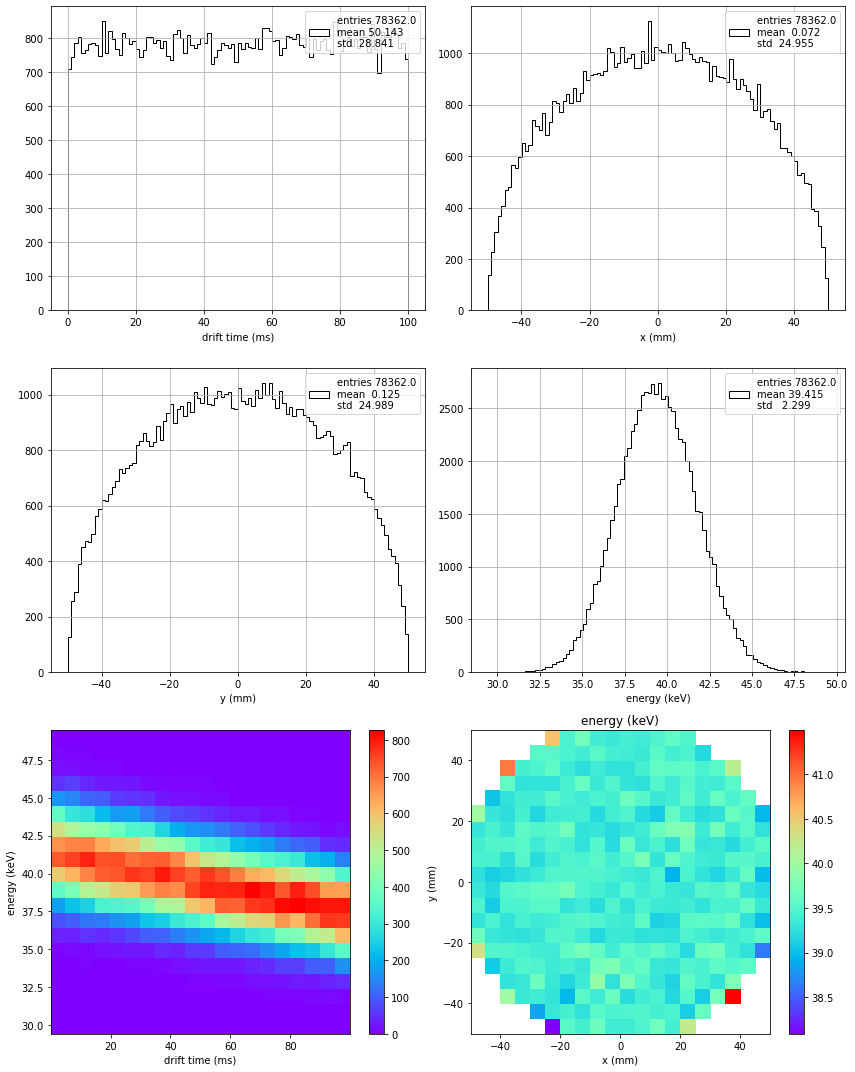

In [12]:
plot_data(df)

In [13]:
coors  = (df.dtime.values,)
energy = df.energy.values
bins   = 100
krmap  = prof.profile(coors, energy, bins)

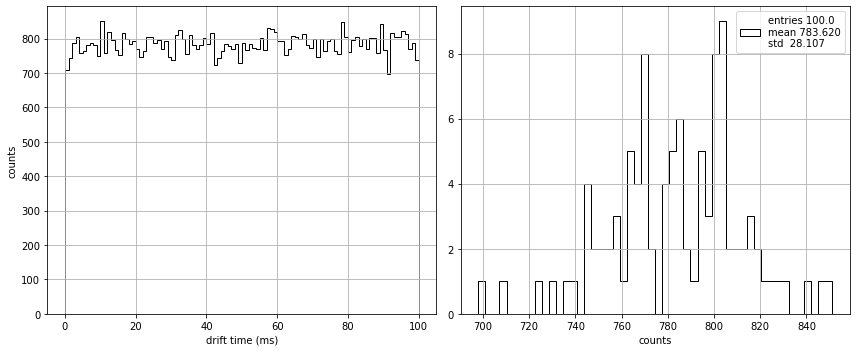

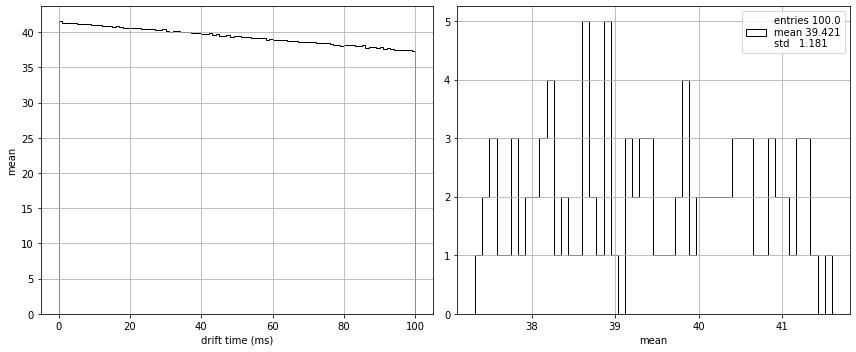

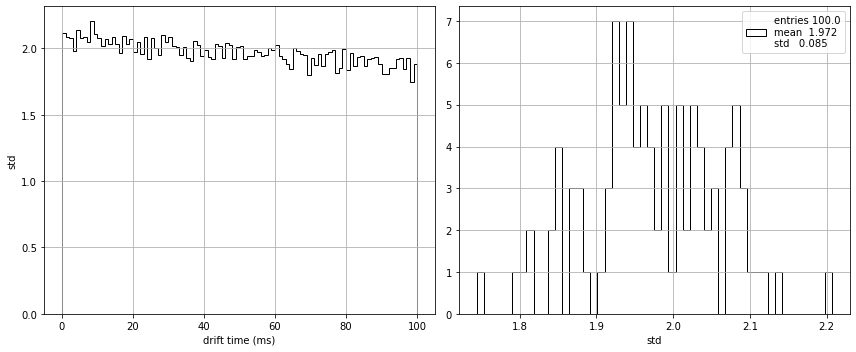

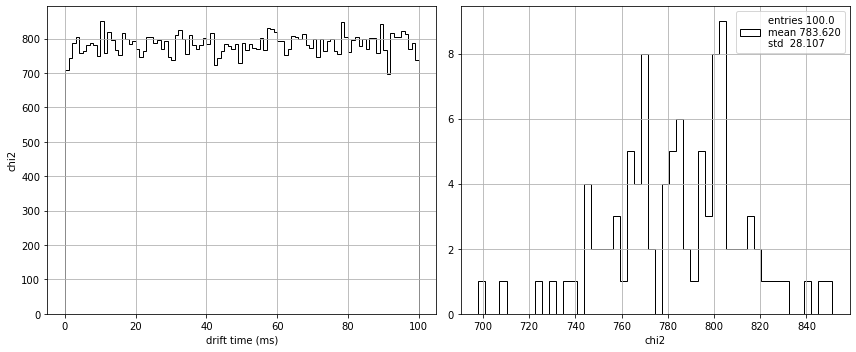

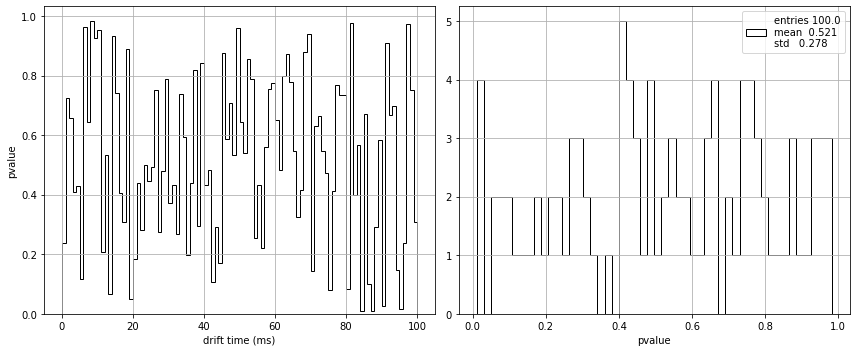

In [14]:
prof.plot_profile(krmap)

### correction

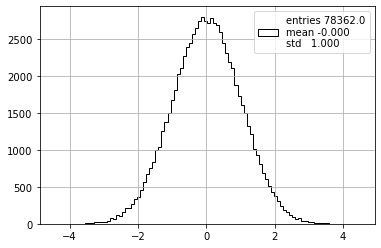

In [15]:
pltext.hist(krmap.residuals, 100);

In [16]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

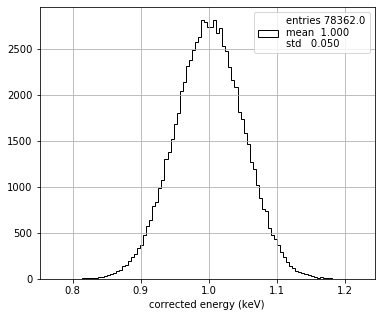

In [17]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
plt.xlabel('corrected energy (keV)');

### Validate correction

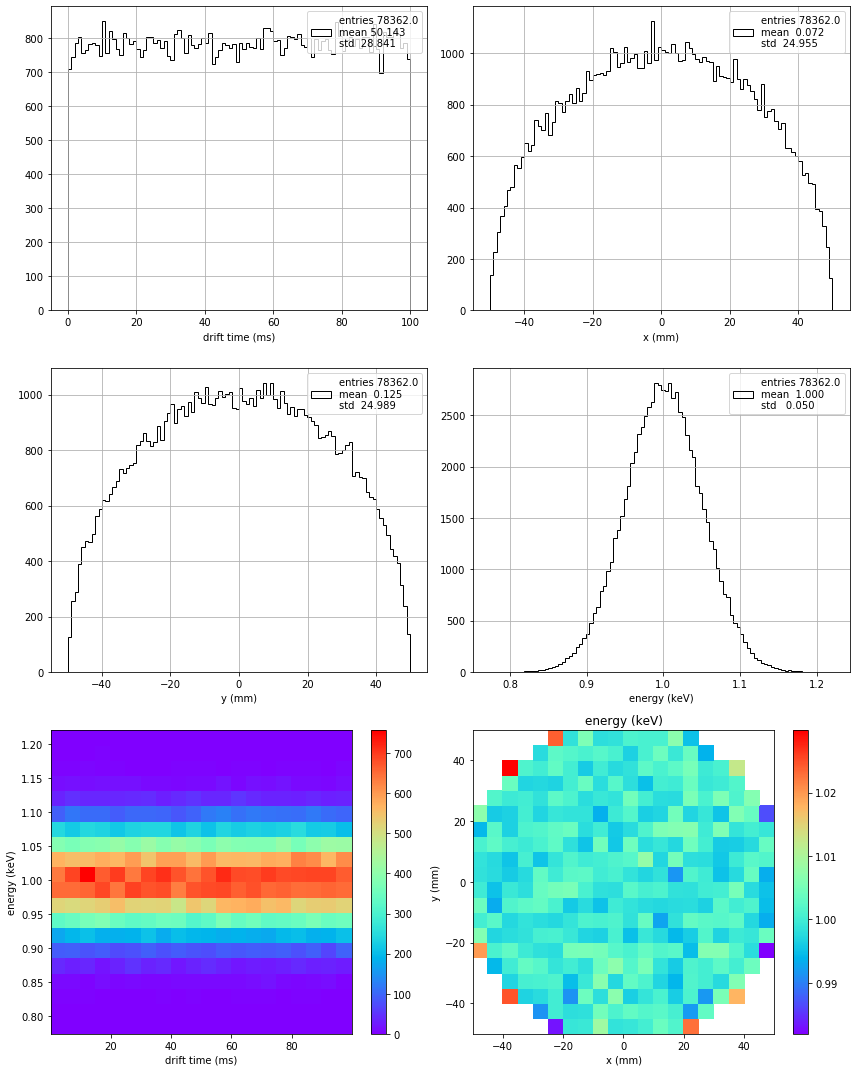

In [18]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
plot_data(xdf)

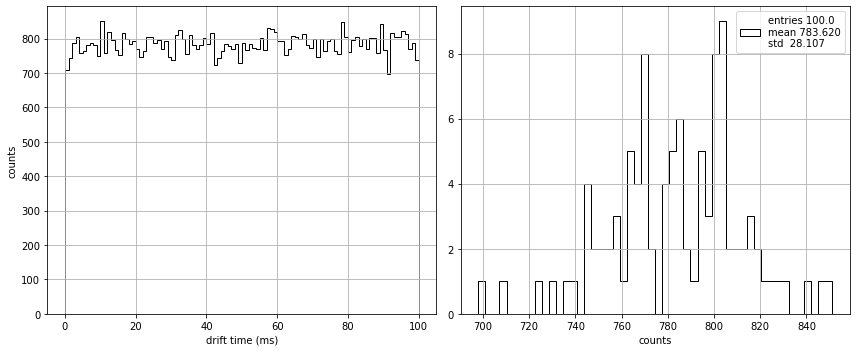

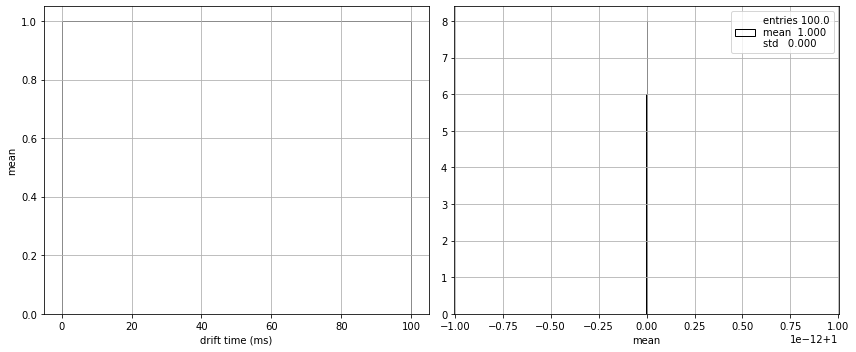

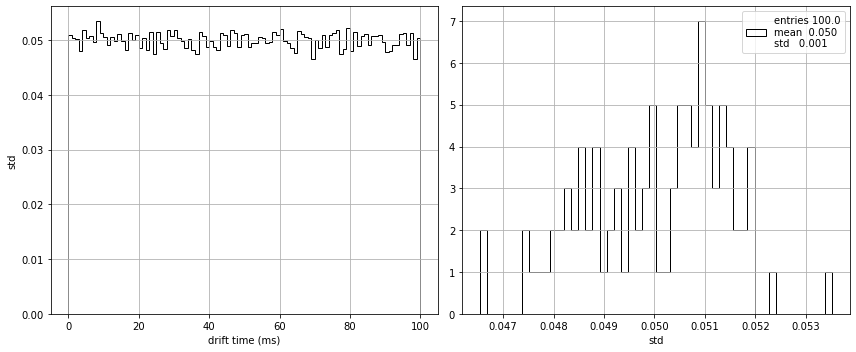

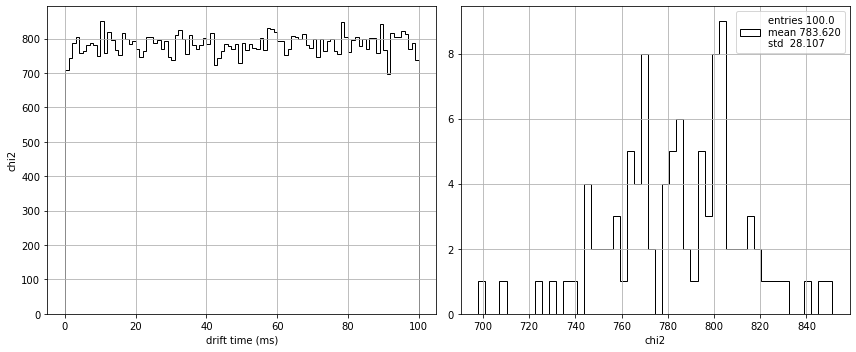

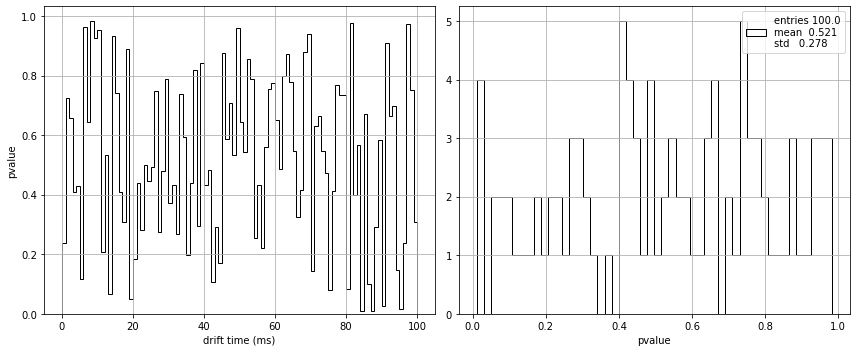

In [19]:
prof.plot_profile(corkrmap)

## 2D

In [20]:
df = generate_kr_toy(100000, tau = 0., beta = 0.2)
df

,dtime,x,y,energy
0,60.403911,46.519725,18.139539,30.794081
1,95.065599,-18.992161,-18.891863,39.956533
2,65.500413,35.066610,1.747699,38.228443
3,15.109601,8.064602,33.666721,34.914163
4,65.154867,2.060481,-6.561552,39.857338
...,...,...,...,...
78588,96.179668,-36.987658,10.890777,35.200717
78589,40.236846,-13.343778,-42.047165,33.144345
78590,11.207273,-24.809540,-19.147713,38.568662
78591,7.056227,-20.051644,3.181587,41.636034


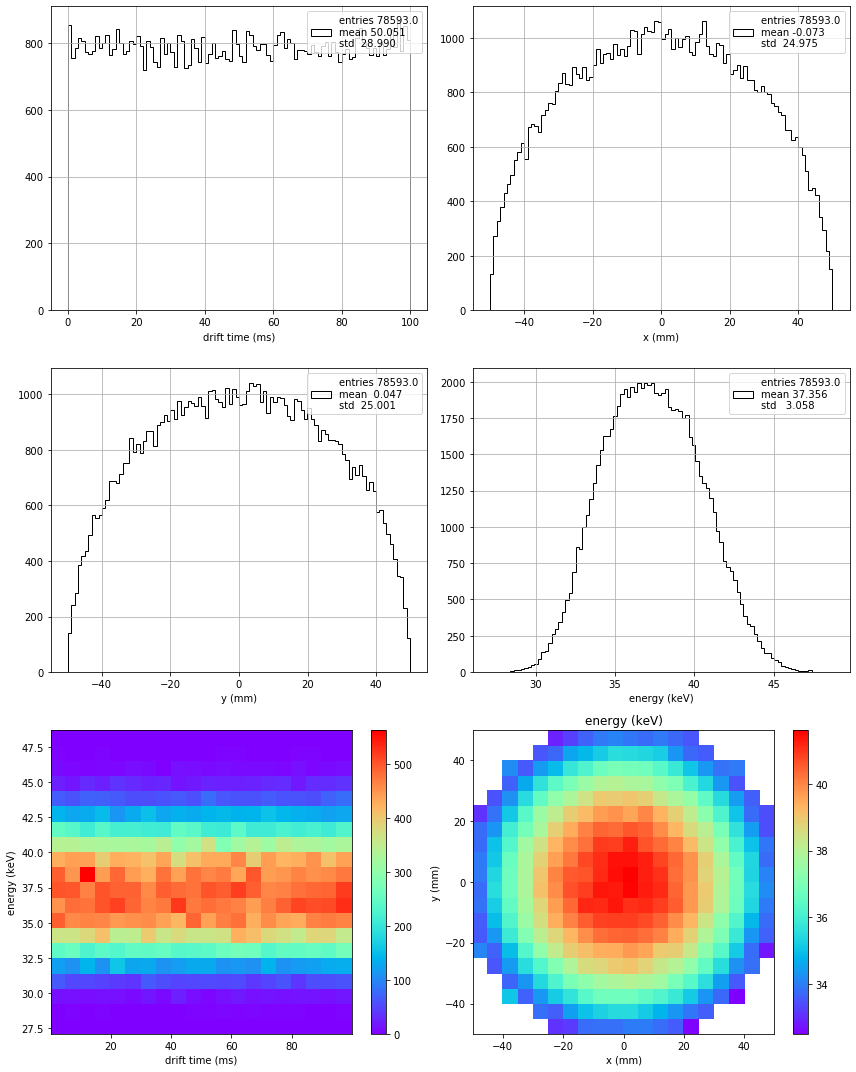

In [21]:
plot_data(df)

### kr  map

In [22]:
coors  = (df.x.values, df.y.values)
energy = df.energy.values
bins   = 40, 40
krmap  = prof.profile(coors, energy, bins)

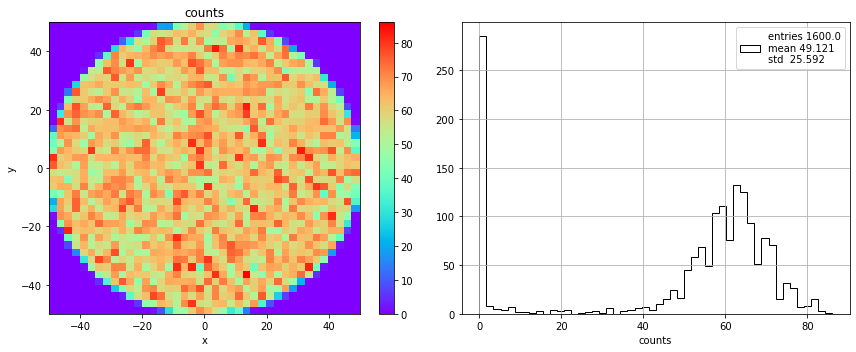

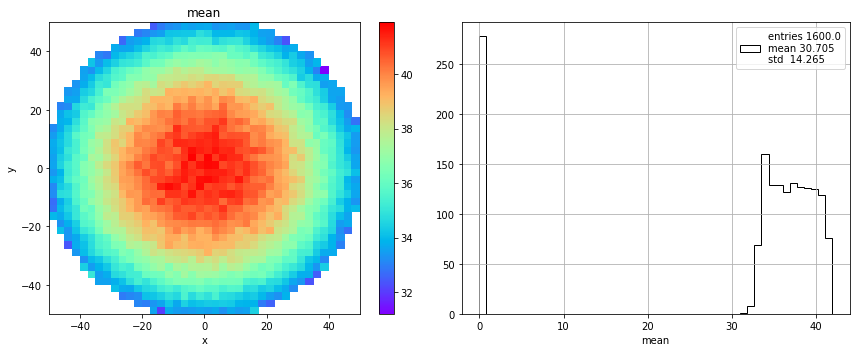

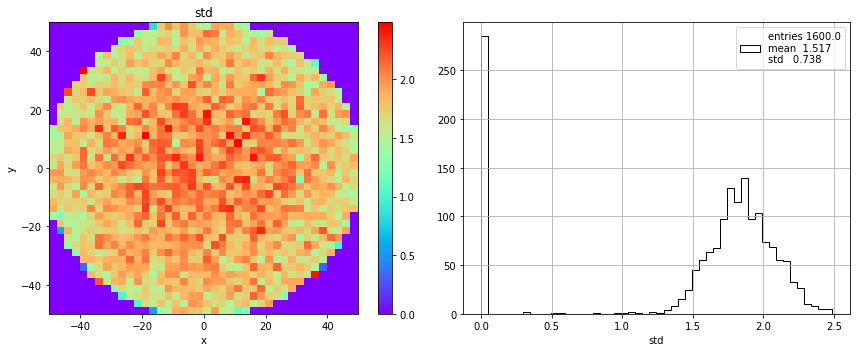

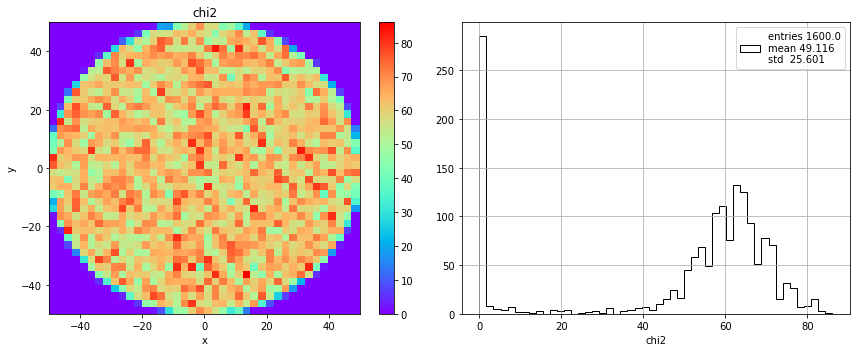

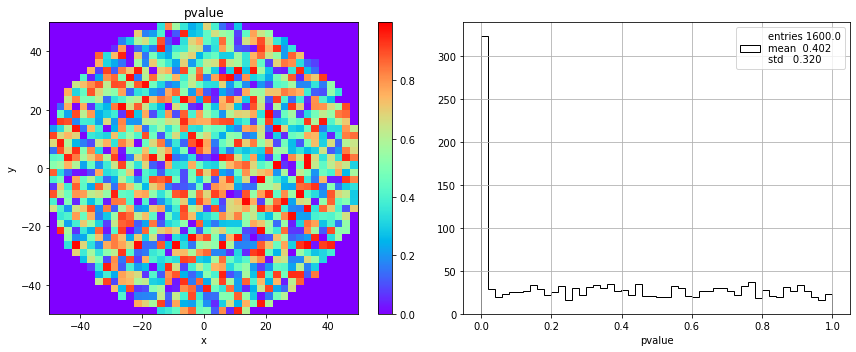

In [23]:
prof.plot_profile(krmap)

### Correction

In [24]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

Text(0.5, 0, 'corrected energy (keV)')

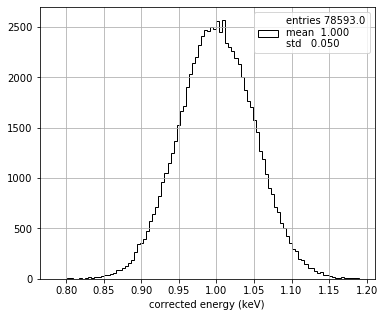

In [25]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
plt.xlabel('corrected energy (keV)')

### Validate correction

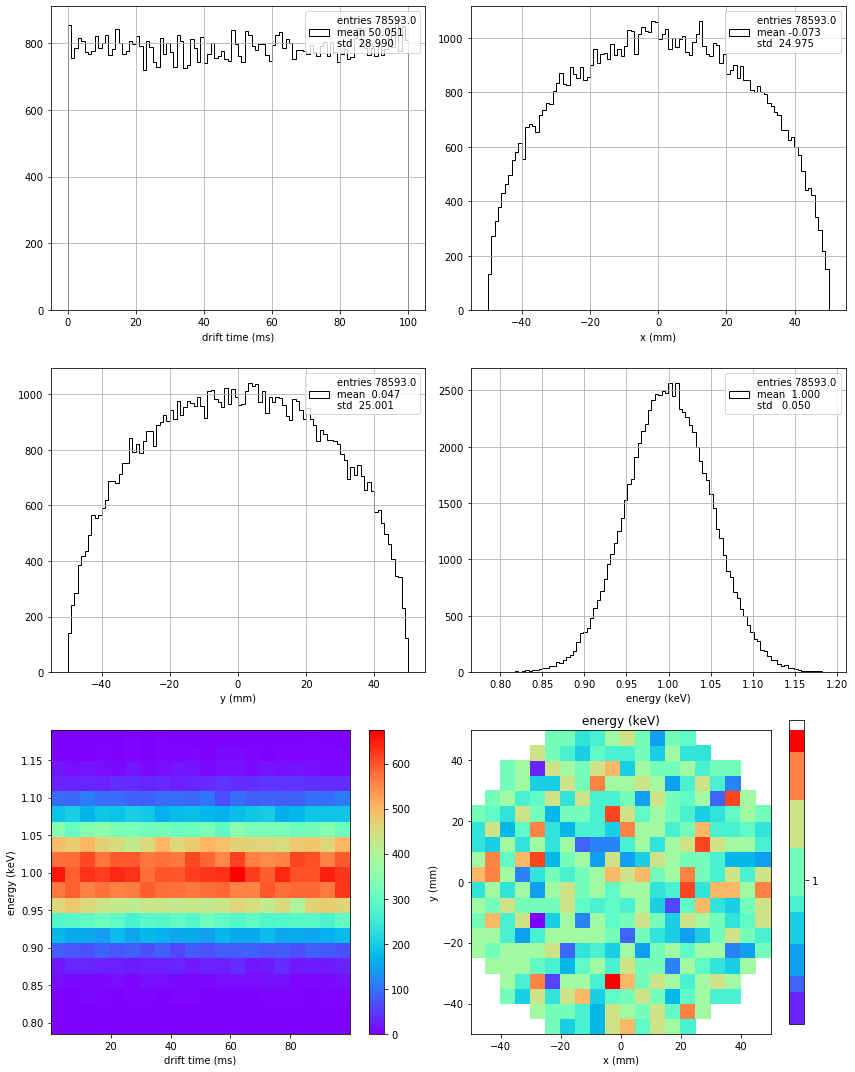

In [26]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
plot_data(xdf)

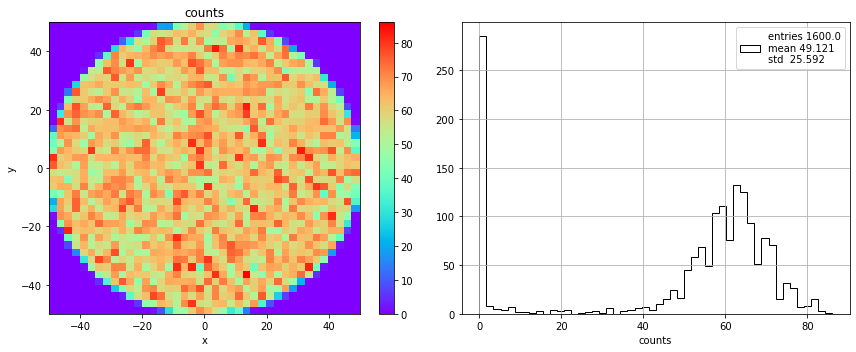

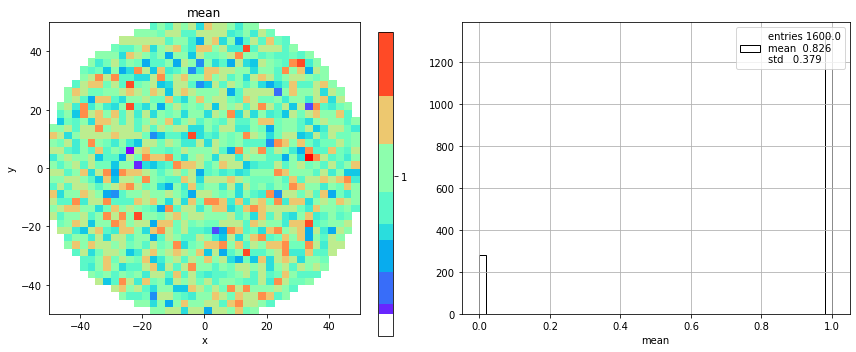

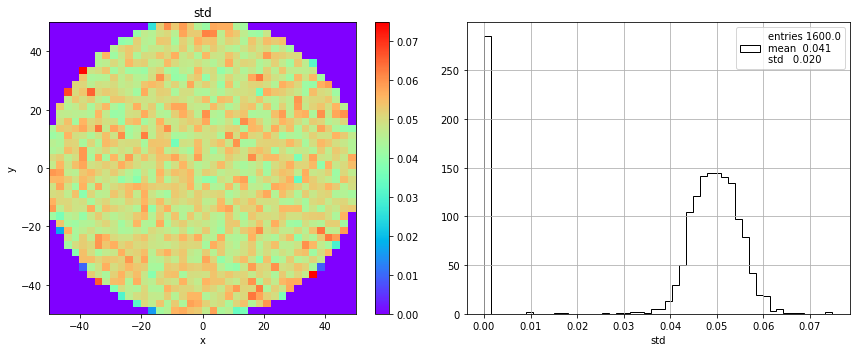

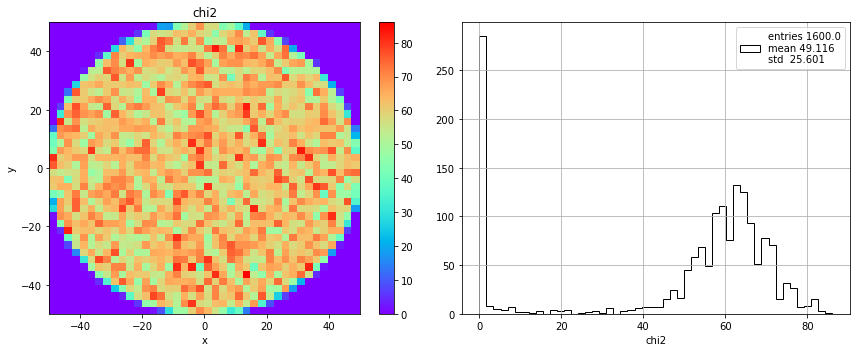

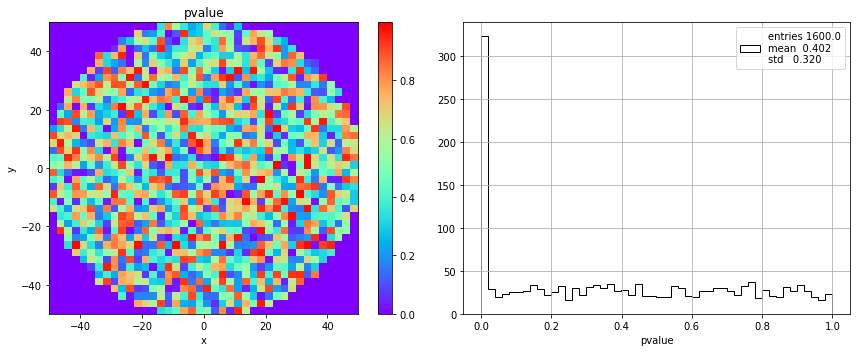

In [27]:
prof.plot_profile(corkrmap)

## 3D

In [28]:
df = generate_kr_toy(100000, tau = 0.1, beta = 0.2)
df

,dtime,x,y,energy
0,39.371252,29.799199,8.974739,34.564934
1,84.666853,-1.094647,15.498186,40.347027
2,88.066336,-2.685729,29.873562,32.875105
3,8.234180,15.251645,-7.733324,40.556672
4,85.593832,14.915284,-19.692291,36.481908
...,...,...,...,...
78471,32.715351,34.478531,-32.896780,33.588935
78472,28.299843,-29.344590,-20.966402,36.933033
78473,11.359552,41.195924,-16.724179,34.730171
78474,23.112804,18.617547,35.347318,34.934348


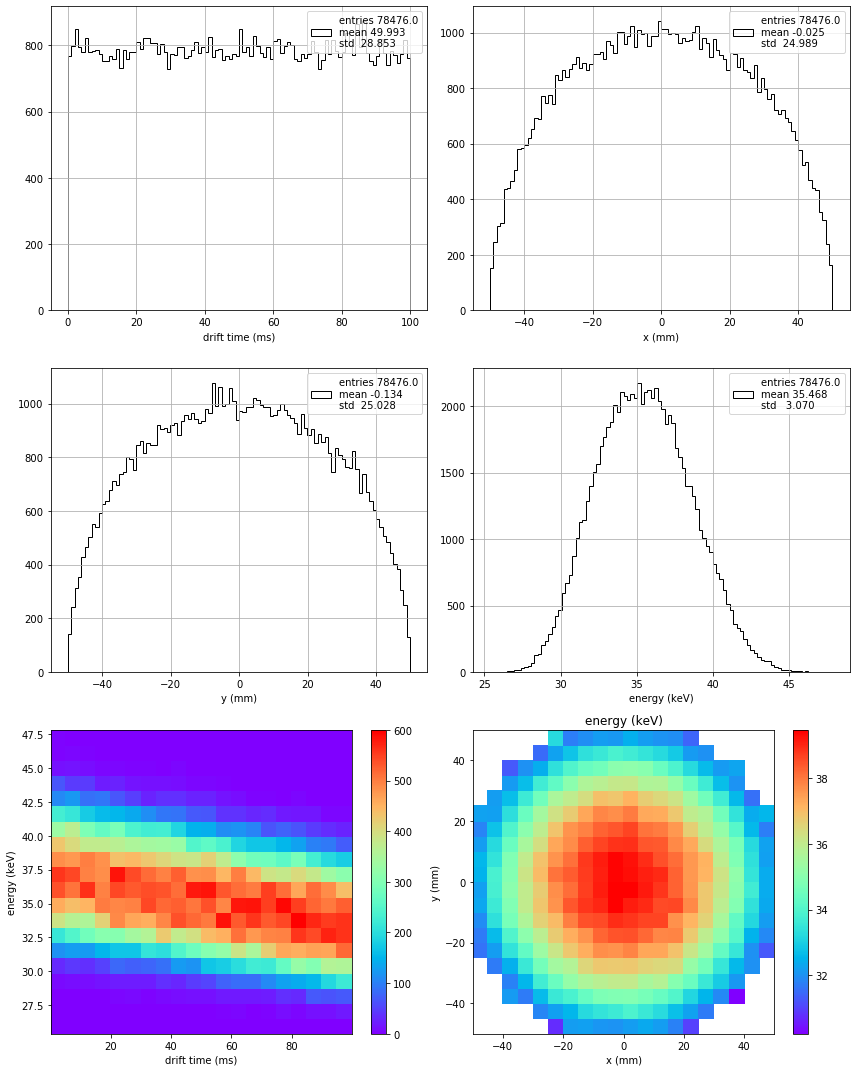

In [29]:
plot_data(df)

### Kr map

In [30]:
coors  = (df.x.values, df.y.values, df.dtime.values)
energy = df.energy.values
bins   = 20, 20, 4
krmap  = prof.profile(coors, energy, bins)

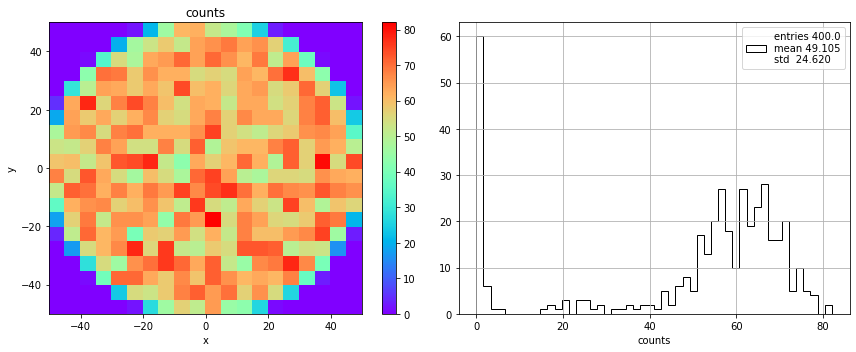

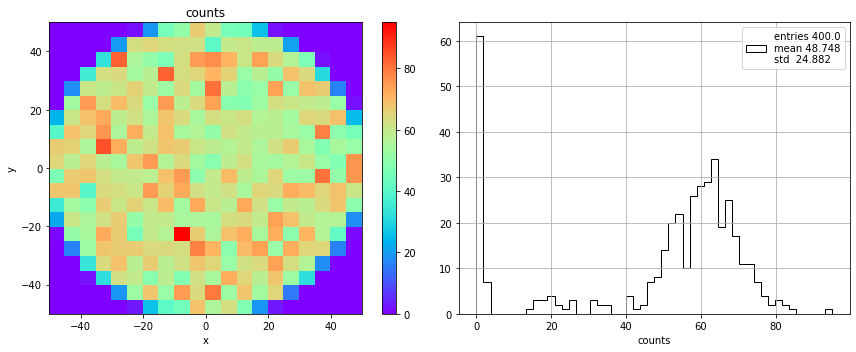

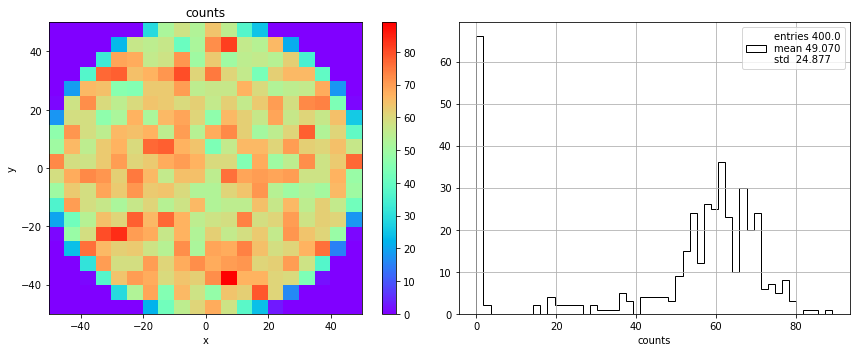

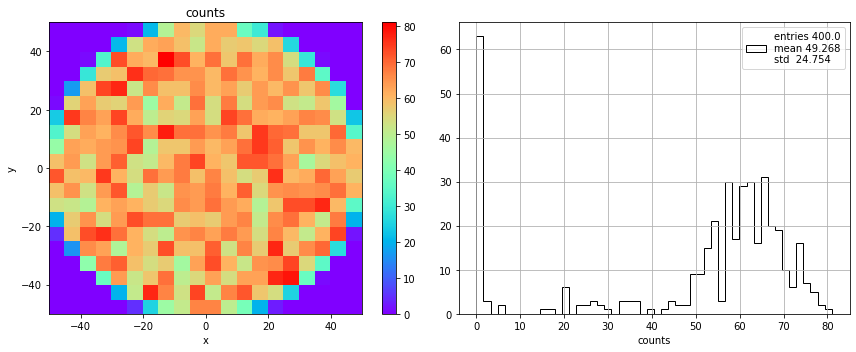

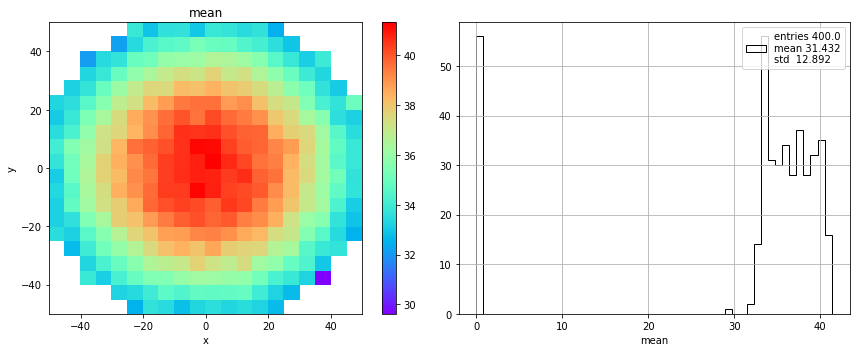

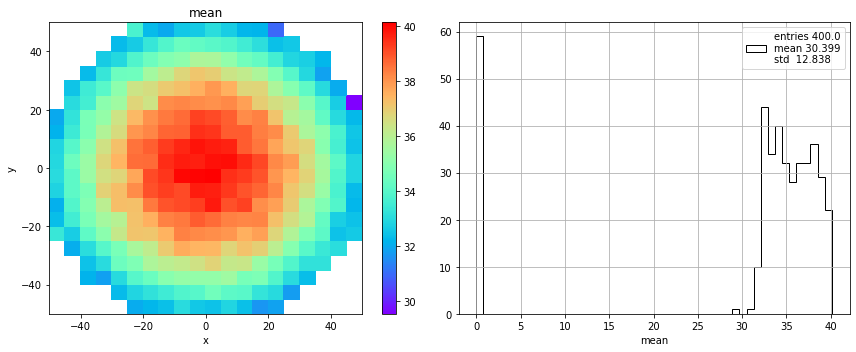

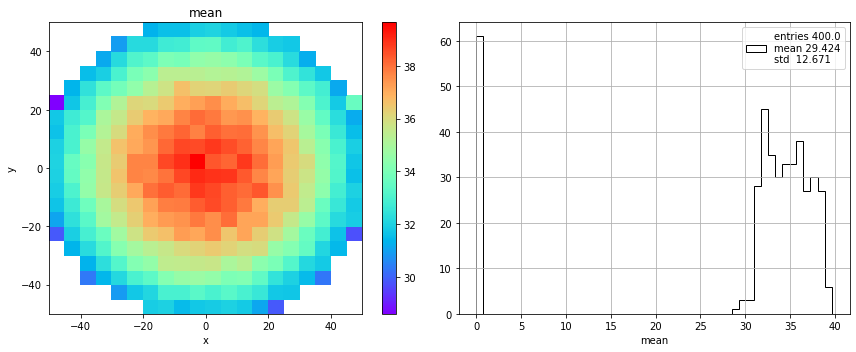

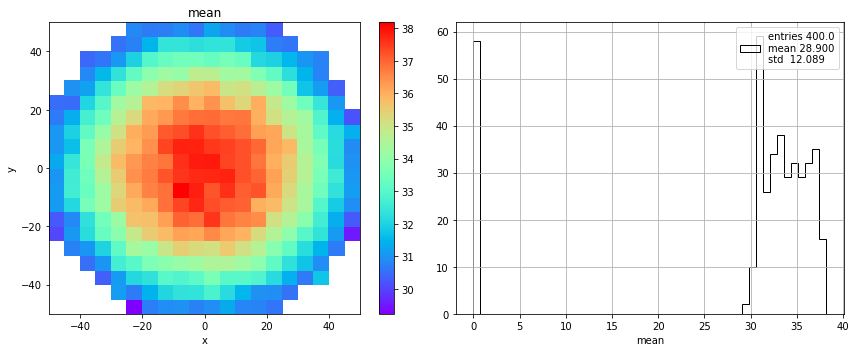

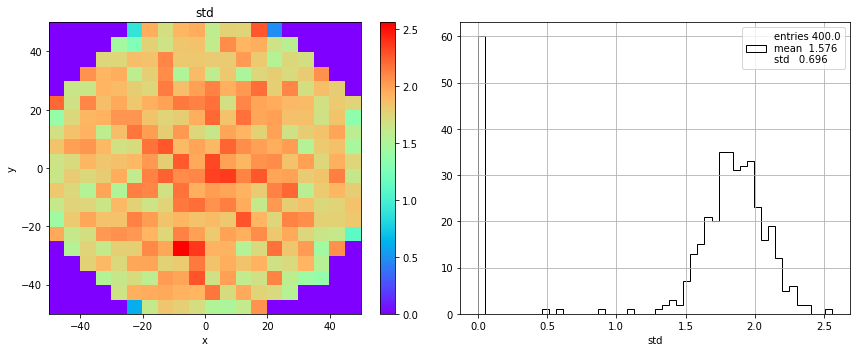

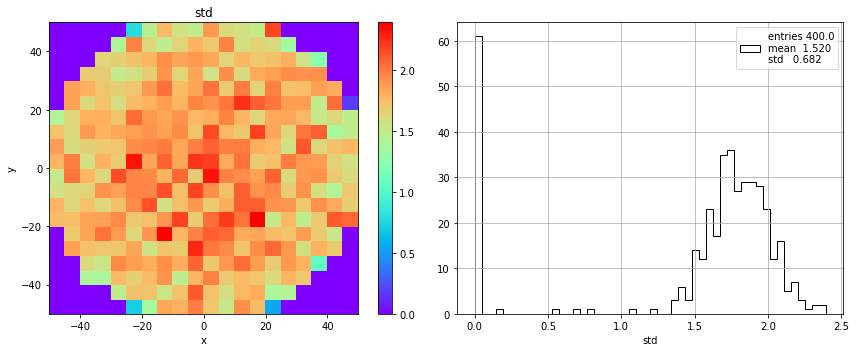

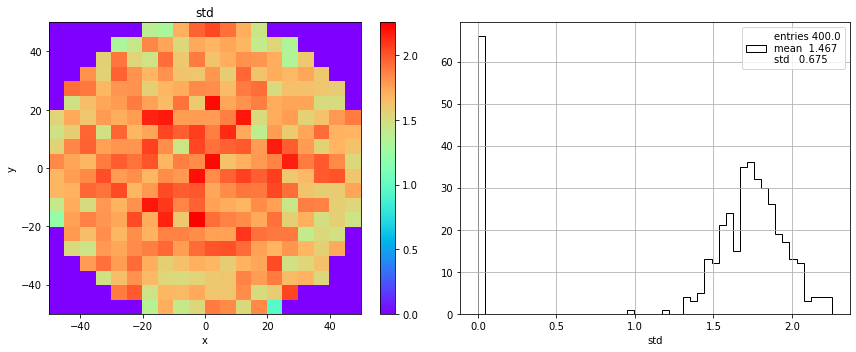

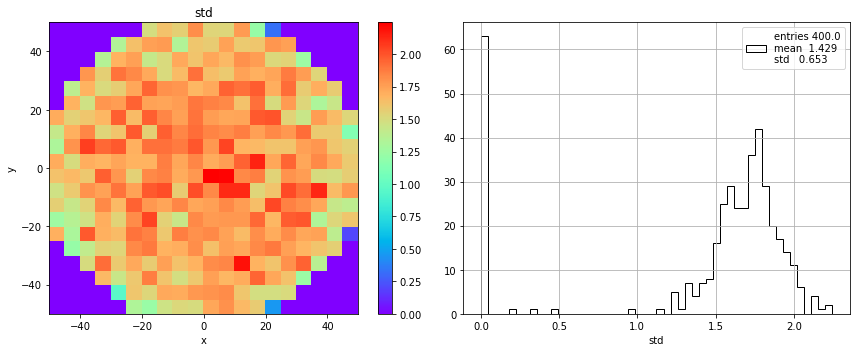

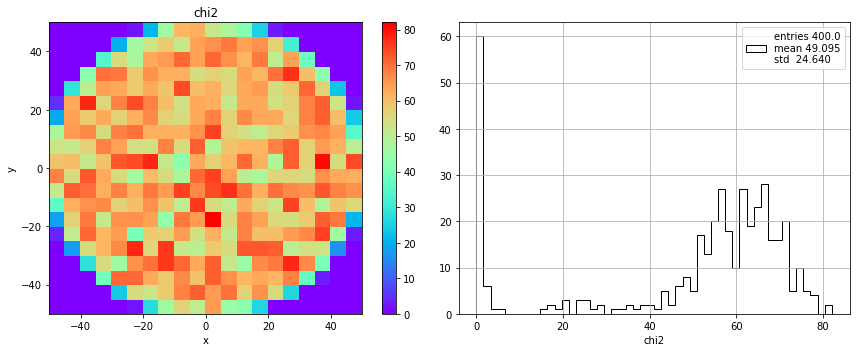

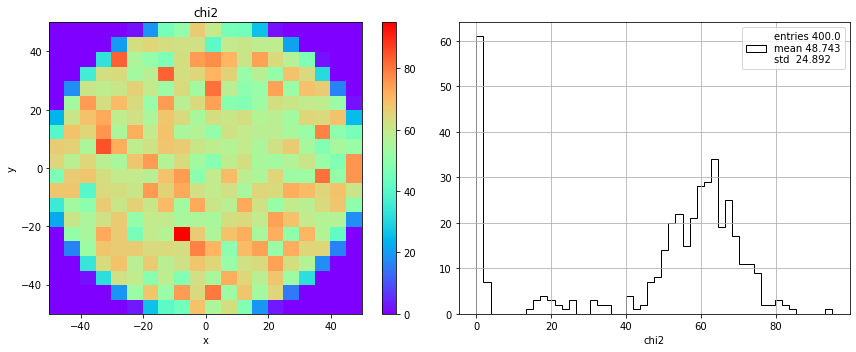

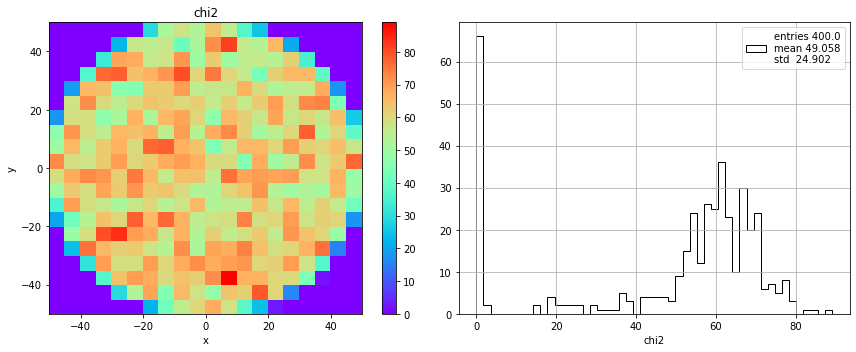

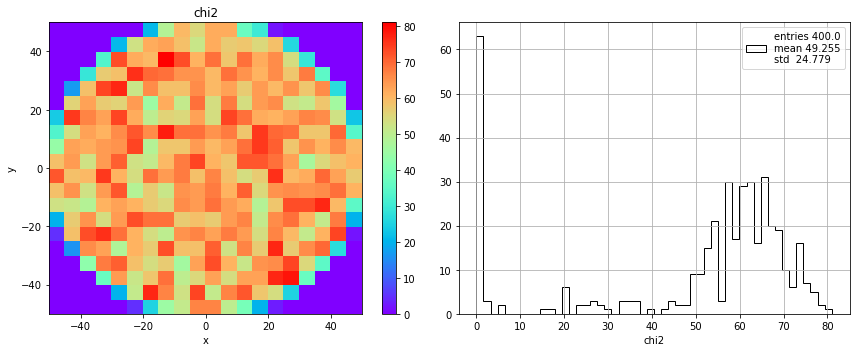

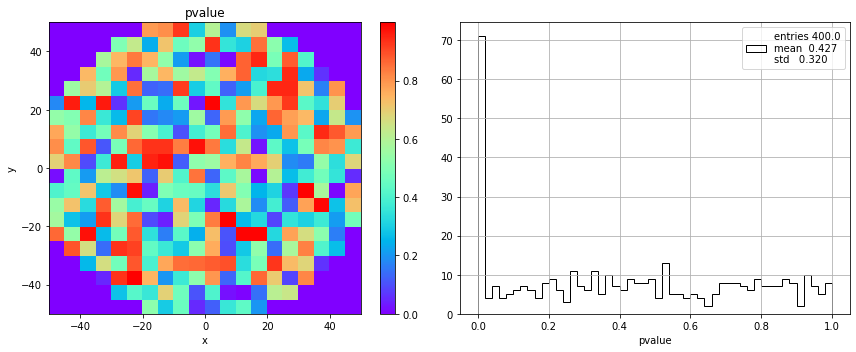

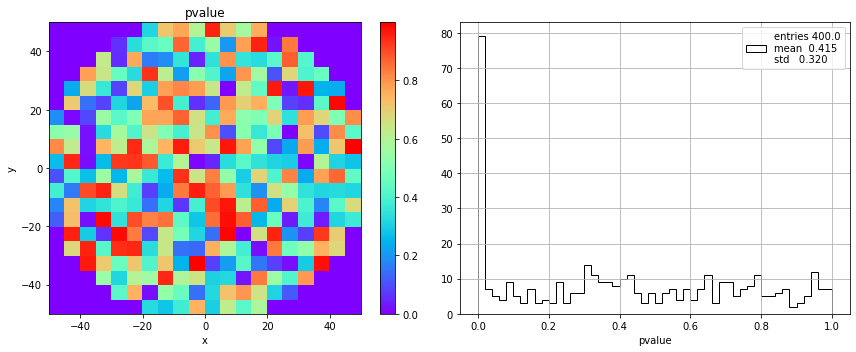

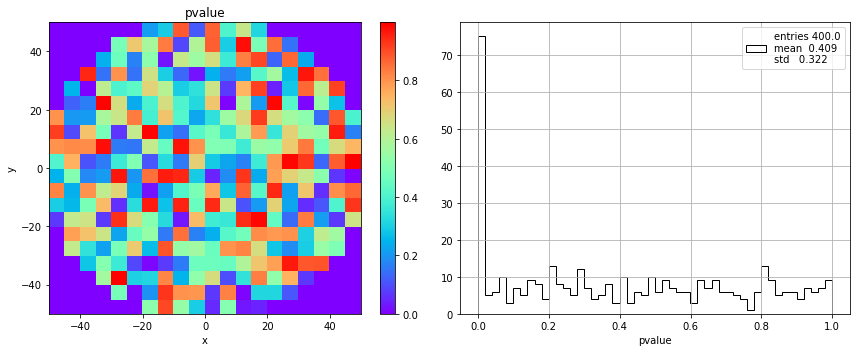

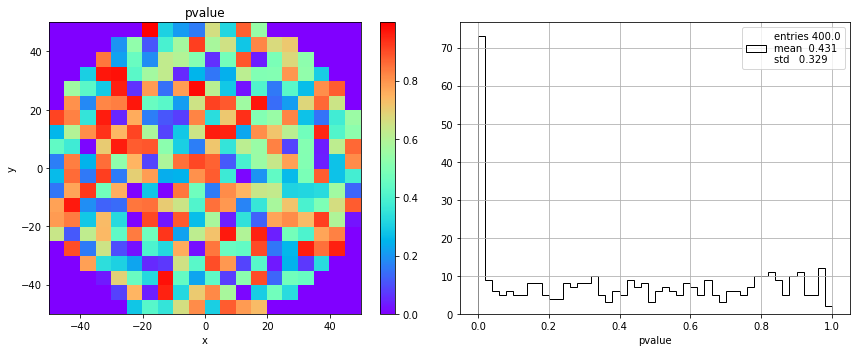

In [31]:
prof.plot_profile(krmap)

### corrections

In [32]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

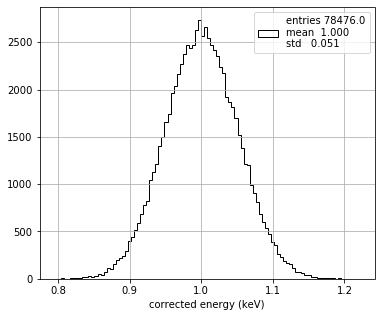

In [33]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
plt.xlabel('corrected energy (keV)');

### Validate correction

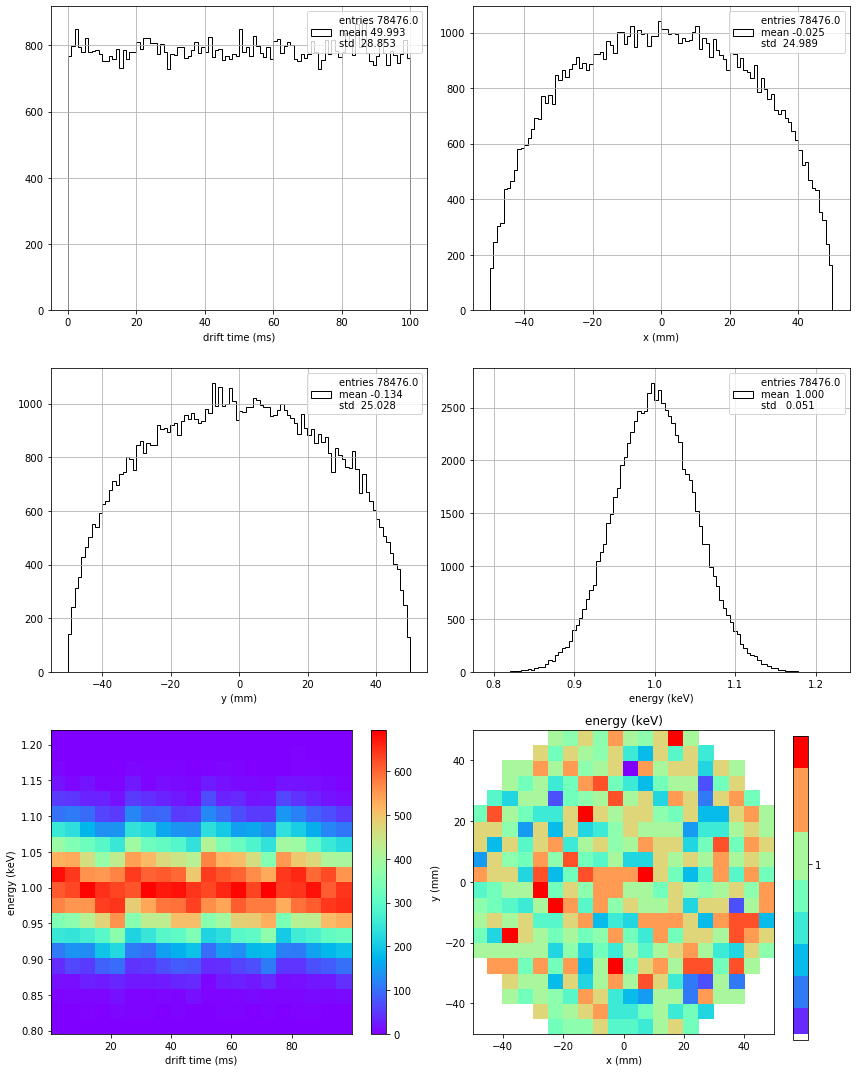

In [34]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
plot_data(xdf)

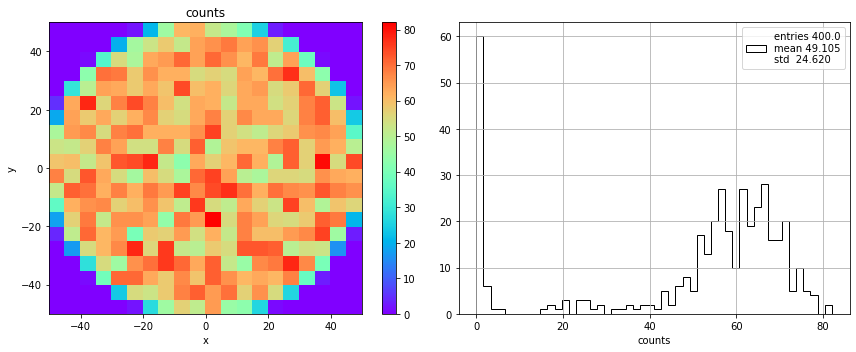

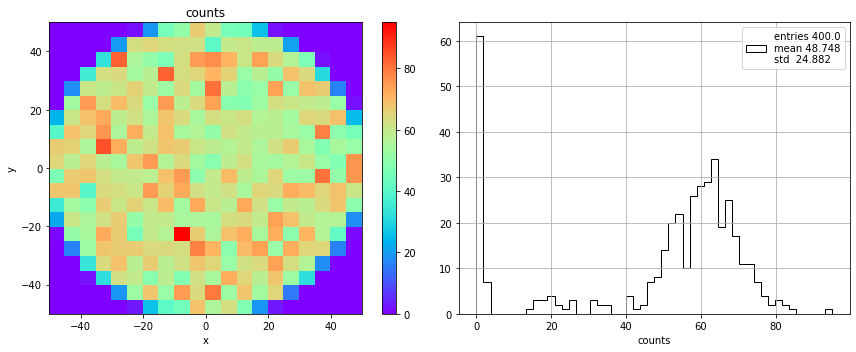

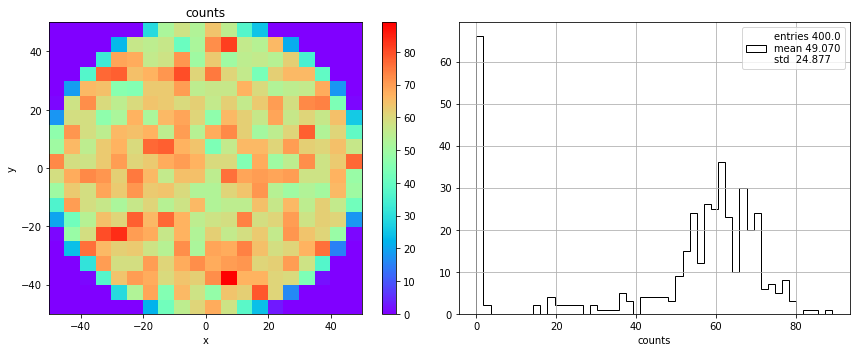

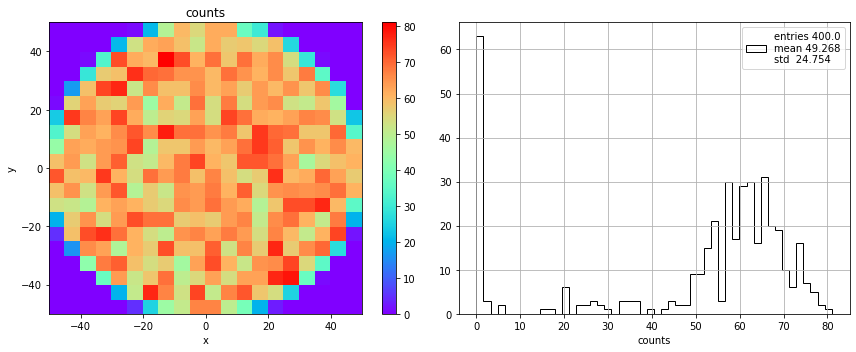

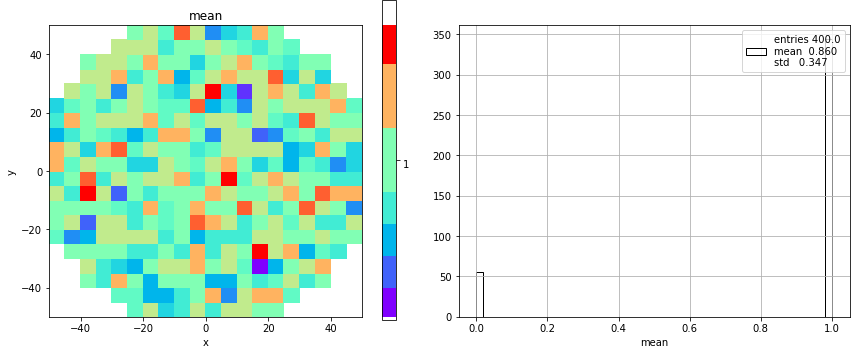

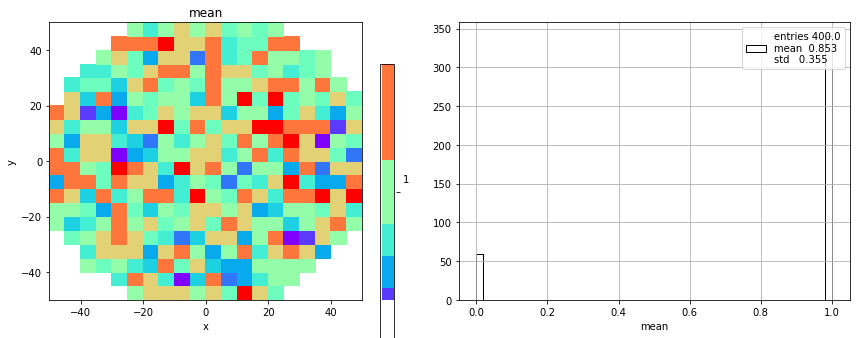

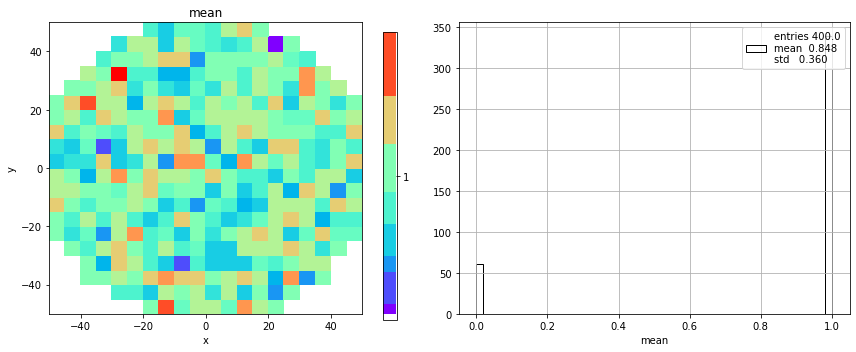

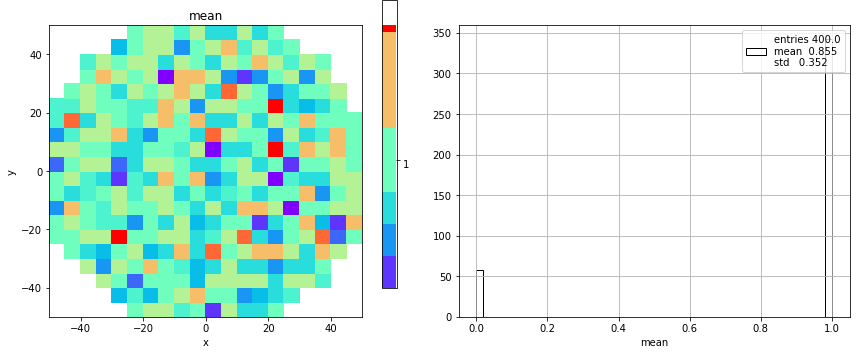

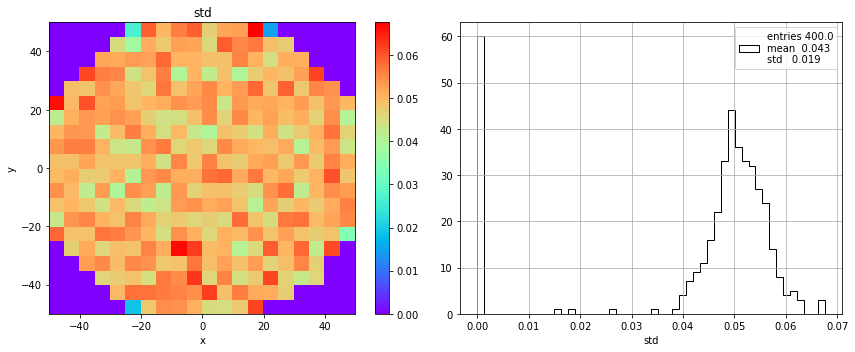

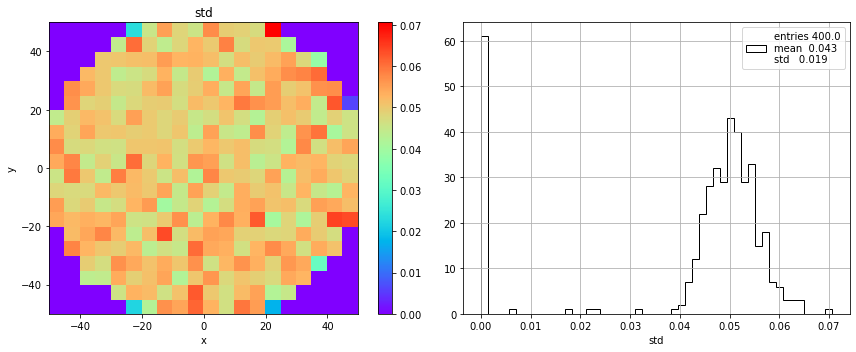

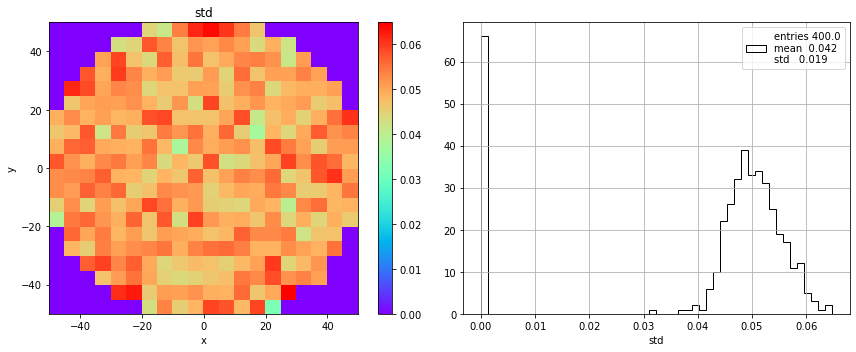

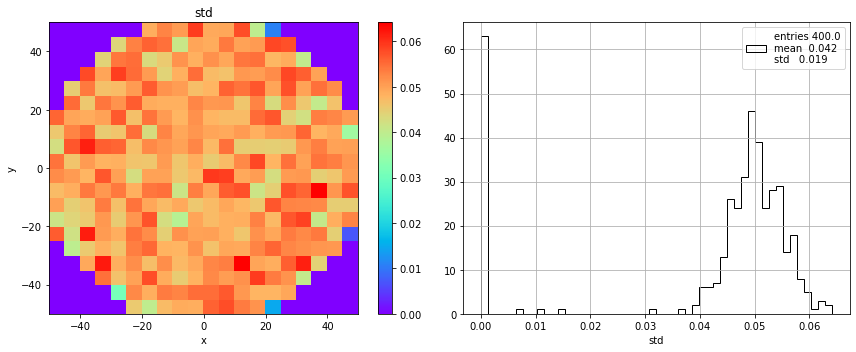

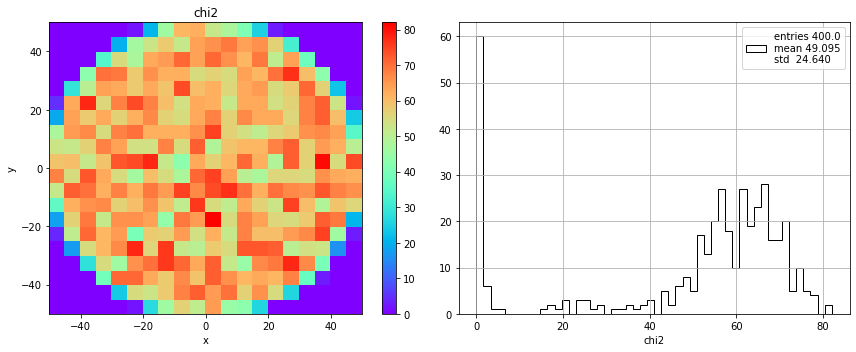

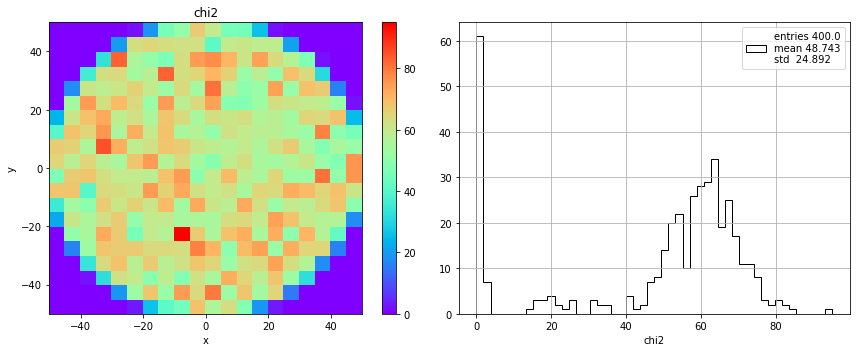

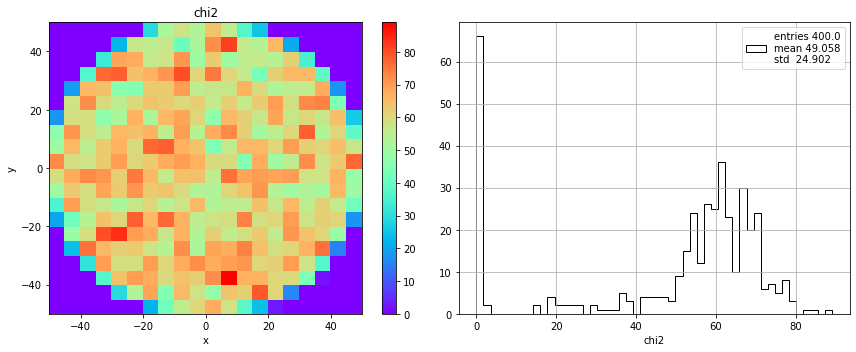

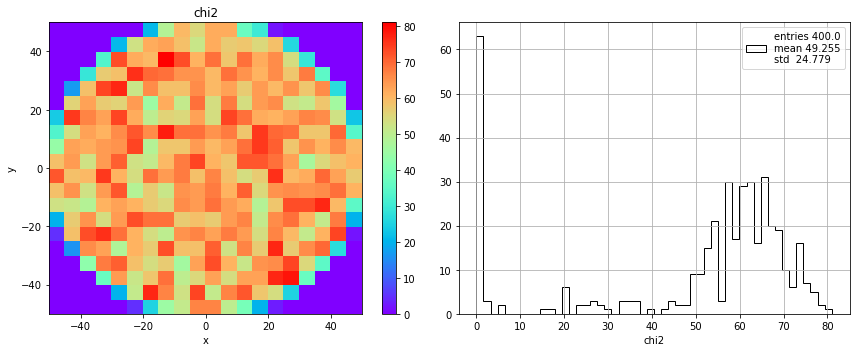

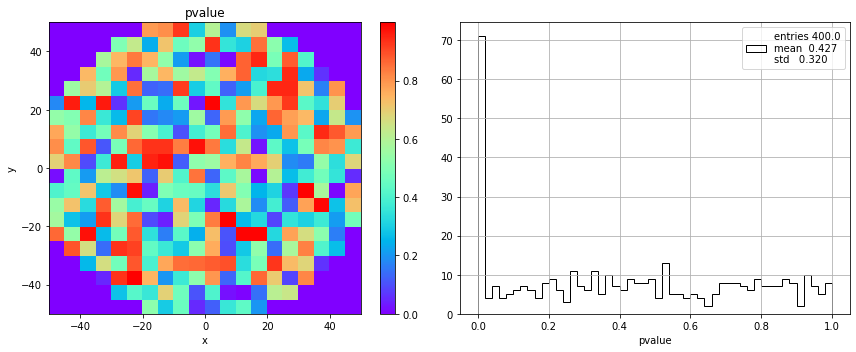

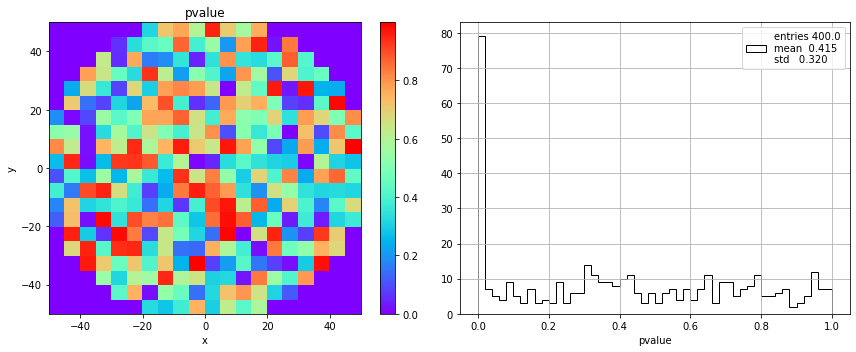

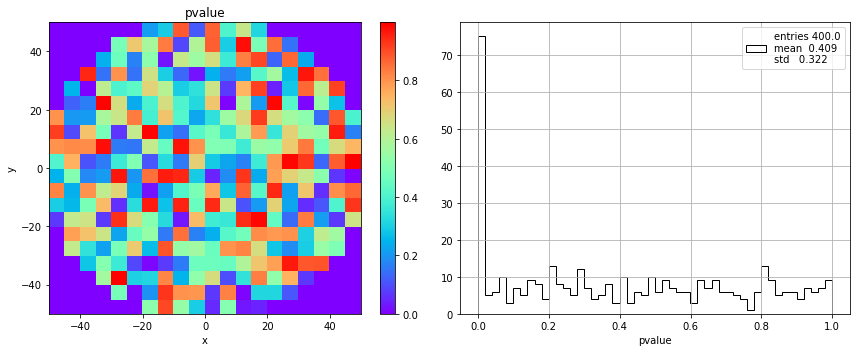

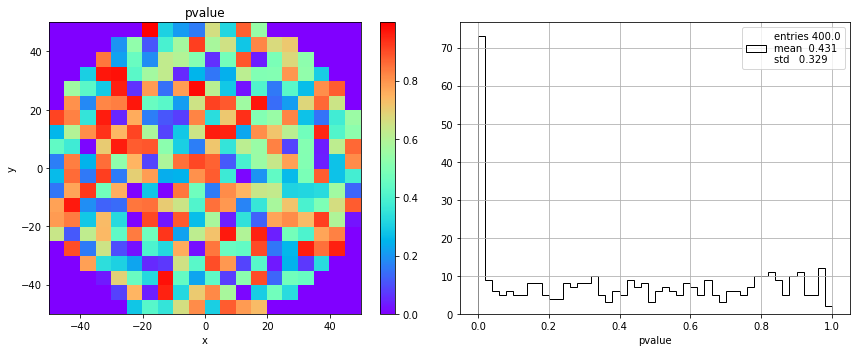

In [35]:
prof.plot_profile(corkrmap)